# Oppgave 4: Dataanlyse
Jeg bruker NumPy og Pandas til å beregne gjennomsnitt, median og standardavvik for albedo-data hvert år og for utvalgte punkter, fordi disse statistiske målene gir oversikt over dataen og hjelper med å oppdage trender eller avvik i datasettet.

For å undersøke sammenhengen mellom år og albedo bruker jeg Pearson-korrelasjon, som enkelt implementeres med scipy og gir et mål på styrken og retningen på relasjonen mellom variablene.

Jeg håndterer skjevheter og uregelmessigheter ved å filtrere bort punkter med lav albedo, rense og kontrollere datasettene for feil, og visualiserer resultatene med heatmap og tidsseriegrafer for å tydelig formidle mønstre og sikre at analysen er pålitelig.

Albedo er **avhengig variabel** (y), og år, breddegrad (lat), lengdegrad (lon) og feilmargin (ERR) som **uavhengige variabler** (x). Vi plotter albedo som funksjon av år for å se trender. Når år øker, ser vi at gjennomsnittlig albedo synker svakt.

---

### Output fra kode

1. beregn_albedo_statistikk() – Beregner gjennomsnitt, median og standardavvik for albedo hvert år med Pandas; dette er statistisk dataanalyse i tråd med sensorveiledningen.

2. plot_albedo_heatmap_med_feilmargin() – Visualiserer albedo-data som heatmap med markering av lav feilmargin; dette oppfyller kravet om å gjøre miljødata forståelig med visualisering.

3. statistikk_albedo() – Regner ut statistiske mål for alle punkter med albedo > 0.3 hvert år, og bruker Pandas til dataanalyse som forventet i sensorveiledningen.

4. albedo_statistikk_faste_2004_punkter() – Analyserer utvikling i albedo for faste referansepunkter fra 2004 med Pandas; dette viser bruk av filtrering og tidsserieanalyse som sensorveiledningen krever.

5. pearson_albedo_vs_year() – Beregner Pearson-korrelasjon mellom år og albedo for å analysere sammenhenger, noe som dekker sensorveiledningens krav til bruk av statistiske metoder.

6. beskriv_albedo_statistikk() – Gir et statistisk sammendrag av albedo-data med describe, som oppfyller sensorveiledningens forventning om utforskning og beskrivelse av datasett.


#### Kode 1


Denne koden henter ut albedo effekten i alpene fra 2004 til 2024 hvor feil marginen er lav fra data_m-lavfeilmargin (oppgave 3 fil*). Deretter tar den dataen år for år og regner ut gjennomsnitt, standardavvik og median og lagrer alt i en matrise array.


In [ ]:
import sys
sys.path.append('../src') 

from albedo_effekt import dataanalyse

matrise, år, gj, median, std = dataanalyse.beregn_albedo_statistikk()



📊 Albedo-statistikk matrise:
[År, Gjennomsnitt, Median, Standardavvik]
[[2004.        0.1623    0.1659    0.0337]
 [2005.        0.1635    0.1681    0.0327]
 [2006.        0.1633    0.1673    0.0318]
 [2007.        0.1601    0.1648    0.034 ]
 [2008.        0.1617    0.1663    0.0326]
 [2009.        0.1647    0.1697    0.0319]
 [2010.        0.1611    0.1643    0.0306]
 [2011.        0.157     0.1611    0.0327]
 [2012.        0.1648    0.1687    0.0319]
 [2013.        0.1606    0.1634    0.0348]
 [2014.        0.1615    0.1653    0.033 ]
 [2015.        0.1636    0.1674    0.0319]
 [2016.        0.156     0.1595    0.0334]
 [2017.        0.1615    0.1675    0.0313]
 [2018.        0.1611    0.1649    0.0303]
 [2019.        0.1619    0.1651    0.0293]
 [2020.        0.1573    0.1611    0.0305]
 [2021.        0.1646    0.1684    0.0302]
 [2022.        0.1607    0.1649    0.0279]
 [2023.        0.1442    0.1459    0.0286]
 [2024.        0.1601    0.1626    0.0284]]


### Kommentar

Gjennomsnittet varierer mellom 0.15 og 0.158. Utenom 2023 som kan tyde på en feilkildet dette året med verdien 0.1392. Denne feilkilden kan komme av ekstrem varme, isforsvinning eller tekninsk målefeil.
Medianen følger gjennomsnittet tett som tyder på at dataen er symmetrisk fordelt
Standardavviket holder seg konsistent med en dyp mot 2023. Men er såpass lav at gjennomsnittet gir et godt bildet av virkligheten.

### Kode 2
I kode 1 synker ikke grafen som vi antok. 

Vi tar derfor å visualiser data_m-lavfeilmargin i 2004 for å finne ut hva som skjer


### Kommentar
Denne koden visualiserer albedo-data for 2004 som et varmekart, hvor høyere albedo-verdier vises med lysere farger. Kartet kombinerer disse verdiene med røde prikker som markerer geografiske punkter med lav målefeil, noe som indikerer høy datakvalitet. Resultatet gir et raskt og visuelt inntrykk av hvor pålitelige og snødekte områder befinner seg

Vi ser at data med lavfeilmargin ikke befinner seg i høyden med is og snø. Is og snø har generellt sett over 0.3 i albedo og er i visualiseringen farget gult. Vi ser at det er overvekt med støy i datasettet og vi gjennomfører kode 1 med et mere filtrert datasett ved å kun se på områder med snø og is. Dette kalles Signal-to-Noise ratio (SNR) siden data settet inneholder en alt for stor overvekt av støy i forhold til signalet.

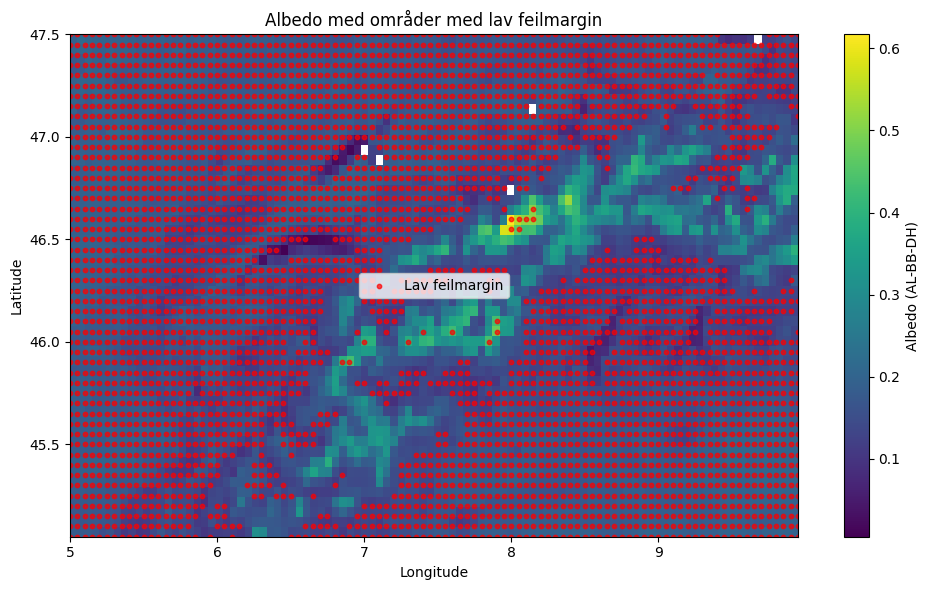

(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'Albedo med områder med lav feilmargin'}, xlabel='Longitude', ylabel='Latitude'>)

In [4]:
import sys
sys.path.append('../src')
from albedo_effekt.dataanalyse import plot_albedo_heatmap_med_feilmargin


plot_albedo_heatmap_med_feilmargin(
    hovedfil="../data/albedo_effekt_data/csv_albedo_effekt/Albedo effekt 2004.csv",
    feilmarginfil="../data/albedo_effekt_data/csv_albedo_effekt/data_m-lavfeilmargin.csv"
)


### Kode 3
Vi gjennomfører kode 1 med et mere filtrert datasett ved å kun se på områder med snø og is(>0.3 albedo) 

Vi bruker fill between for å inkludere standard avviket i koden.
Områdene er ikke nødvendigvis like i alle statistiske måligene på grunn av begrensningen >0.3  (3.2*)

### Kommentar

Gjennomsnittet varierer mellom 0.46 og 0.38. Utenom 2013 som kan tyde på en feilkildet dette året med verdien 0.53. Denne feilkilden kan komme av unormale mengder snø, temperatur varisjon eller tekninsk målefeil.
Medianen følger gjennomsnittet tett som tyder på at dataen er symmetrisk fordelt
Standardavviket holder seg konsistent med en dyp mot 2023. Men er såpass lav at gjennomsnittet gir et godt bildet av virkligheten.

In [5]:
import sys
sys.path.append('../src')

from albedo_effekt.dataanalyse import statistikk_albedo

resultater = statistikk_albedo()


📊 Statistikkmatrise (bare punkter > 0.3, for hvert år separat):
[År, Gjennomsnitt, Median, Standardavvik]
[[2004.        0.3547    0.3379    0.0541]
 [2005.        0.3568    0.343     0.0548]
 [2006.        0.3648    0.3538    0.0518]
 [2007.        0.3713    0.3518    0.0642]
 [2008.        0.3548    0.3406    0.0493]
 [2009.        0.3571    0.3474    0.0465]
 [2010.        0.353     0.344     0.0434]
 [2011.        0.3539    0.3349    0.0533]
 [2012.        0.3608    0.3494    0.0485]
 [2013.        0.383     0.3725    0.0608]
 [2014.        0.3599    0.3444    0.053 ]
 [2015.        0.3662    0.3548    0.0543]
 [2016.        0.3706    0.3565    0.0489]
 [2017.        0.3527    0.3402    0.0465]
 [2018.        0.3618    0.357     0.0443]
 [2019.        0.3626    0.3562    0.0435]
 [2020.        0.3626    0.3529    0.045 ]
 [2021.        0.3681    0.3552    0.0528]
 [2022.        0.3673    0.366     0.0399]
 [2023.        0.3467    0.3407    0.0418]
 [2024.        0.3726    0.3619  

### Kode 3.2

Denne koden fastsetter punktene funnet i 2004 og ser på endringen i snø på disse områdene (3*)

Ved å bruke en fast kontrollgruppe er det vanskligere å få feilkilder.

Vi bruker fill between for å inkludere standard avviket i koden.


### Kommentar
Gjennomsnittet varierer mellom 0.46 og 0.38. Utenom 2013 som kan tyde på en feilkildet dette året med verdien 0.53. Denne feilkilden kan komme av unormale mengder snø, temperatur varisjon eller tekninsk målefeil.
Medianen følger gjennomsnittet tett som tyder på at dataen er symmetrisk fordelt
Standardavviket holder seg konsistent med en dyp mot 2023. Men er såpass lav at gjennomsnittet gir et godt bildet av virkligheten.

De 2 kodene er svært like men ikke helt.

In [6]:
import sys
sys.path.append('../src')

from albedo_effekt.dataanalyse import albedo_statistikk_faste_2004_punkter

resultater = albedo_statistikk_faste_2004_punkter()


🔍 Antall referansepunkter: 16
Gjennomsnittlig forskjell mellom median og gjennomsnitt 0.0086

📊 Statistikkmatrise for faste snøpunkter:
[År, Gjennomsnitt, Median, Standardavvik]
[[2004.        0.4654    0.4521    0.0754]
 [2005.        0.4194    0.4055    0.0765]
 [2006.        0.4302    0.4243    0.0742]
 [2007.        0.4667    0.4575    0.0594]
 [2008.        0.4431    0.4387    0.0654]
 [2009.        0.4546    0.4603    0.0624]
 [2010.        0.4234    0.4111    0.0551]
 [2011.        0.3938    0.3773    0.066 ]
 [2012.        0.4506    0.4444    0.056 ]
 [2013.        0.535     0.5238    0.0598]
 [2014.        0.4556    0.4661    0.0616]
 [2015.        0.4186    0.4007    0.0662]
 [2016.        0.4675    0.4537    0.0551]
 [2017.        0.3931    0.3898    0.0644]
 [2018.        0.3976    0.3935    0.0788]
 [2019.        0.414     0.4007    0.0799]
 [2020.        0.4022    0.3963    0.0799]
 [2021.        0.426     0.4221    0.0939]
 [2022.        0.3459    0.3437    0.0767]
 [202

### Kode 4

Koden bruker scipy og regner ut korrelasjon og p verdi.
Korrelasjonen er styrken og retningen og varrierer hendholdvis fra -1 til 1. Postiv betyr den øker og jo nærmere 0 jo mindre er styrken.
P verdi sier om korrelasjonen er statistisk signifikant. (<0.05)

### Kommentar
"r = -0.4494, p-verdi = 0.0410"
Koden har en moderat negativ korrelasjon og er 95% sikker på at korrelasjonen ikke skylder tilfeldigheter. Desto flere år de måler i fremtiden desto mer nøyaktig vil korrelajonen være, hvis temperaturen forsetter å øke.

Hypotensen at SNR var for høyt og signalet ble dempet var riktig. Nå ser vi en degresjon som vi antok. Ved pearson analysen.

In [7]:
import sys
sys.path.append('../src')
from albedo_effekt.dataanalyse import albedo_statistikk_faste_2004_punkter, pearson_albedo_vs_year

albedo_matrise, årstall, gjennomsnitt, median, std = albedo_statistikk_faste_2004_punkter()
pearson_albedo_vs_year(albedo_matrise)

🔍 Antall referansepunkter: 16
Gjennomsnittlig forskjell mellom median og gjennomsnitt 0.0086

📊 Statistikkmatrise for faste snøpunkter:
[År, Gjennomsnitt, Median, Standardavvik]
[[2004.        0.4654    0.4521    0.0754]
 [2005.        0.4194    0.4055    0.0765]
 [2006.        0.4302    0.4243    0.0742]
 [2007.        0.4667    0.4575    0.0594]
 [2008.        0.4431    0.4387    0.0654]
 [2009.        0.4546    0.4603    0.0624]
 [2010.        0.4234    0.4111    0.0551]
 [2011.        0.3938    0.3773    0.066 ]
 [2012.        0.4506    0.4444    0.056 ]
 [2013.        0.535     0.5238    0.0598]
 [2014.        0.4556    0.4661    0.0616]
 [2015.        0.4186    0.4007    0.0662]
 [2016.        0.4675    0.4537    0.0551]
 [2017.        0.3931    0.3898    0.0644]
 [2018.        0.3976    0.3935    0.0788]
 [2019.        0.414     0.4007    0.0799]
 [2020.        0.4022    0.3963    0.0799]
 [2021.        0.426     0.4221    0.0939]
 [2022.        0.3459    0.3437    0.0767]
 [202

(np.float64(-0.44939103235163586), np.float64(0.04097629685378265))

### Kode 5

Bruker decribe funkjsonen til pandas for å beskrive et datasett.

In [ ]:
import sys
import pandas as pd
sys.path.append('../src')
from albedo_effekt.dataanalyse import beskriv_albedo_statistikk

df = pd.read_csv("../data/albedo_effekt_data/csv_albedo_effekt_komplett/Albedo effekt 2004_komplett.csv")
beskrivelse = beskriv_albedo_statistikk(df)


Statistikk for AL-BB-DH:
count    5000.000000
mean        0.171478
std         0.053235
min         0.005300
25%         0.143000
50%         0.166250
75%         0.184600
max         0.617000
Name: AL-BB-DH, dtype: float64


Vi ser at dataen inneholder svært lave albedoer. Dette betyr at veldig få områder er snø og is men med max ser vi at det finnes snø og is i DF.